# Fashion MNIST

### Fashion MNIST Classification Project

**Kaggle Dataset Link:** [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [12]:
# CSV dosyalarını yükle
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [13]:
# Görüntü ve etiketleri ayır
X_train = train_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # (60000, 28, 28, 1)
y_train = train_df["label"].values  # (60000,)
X_test = test_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0    # (10000, 28, 28, 1)
y_test = test_df["label"].values    # (10000,)

In [14]:
# Sınıf isimleri
class_names = [
    "Tişört/Üst", "Pantolon", "Kazak", "Elbise", "Ceket",
    "Sandalet", "Gömlek", "Spor Ayakkabı", "Çanta", "Bilekte Bot"
]

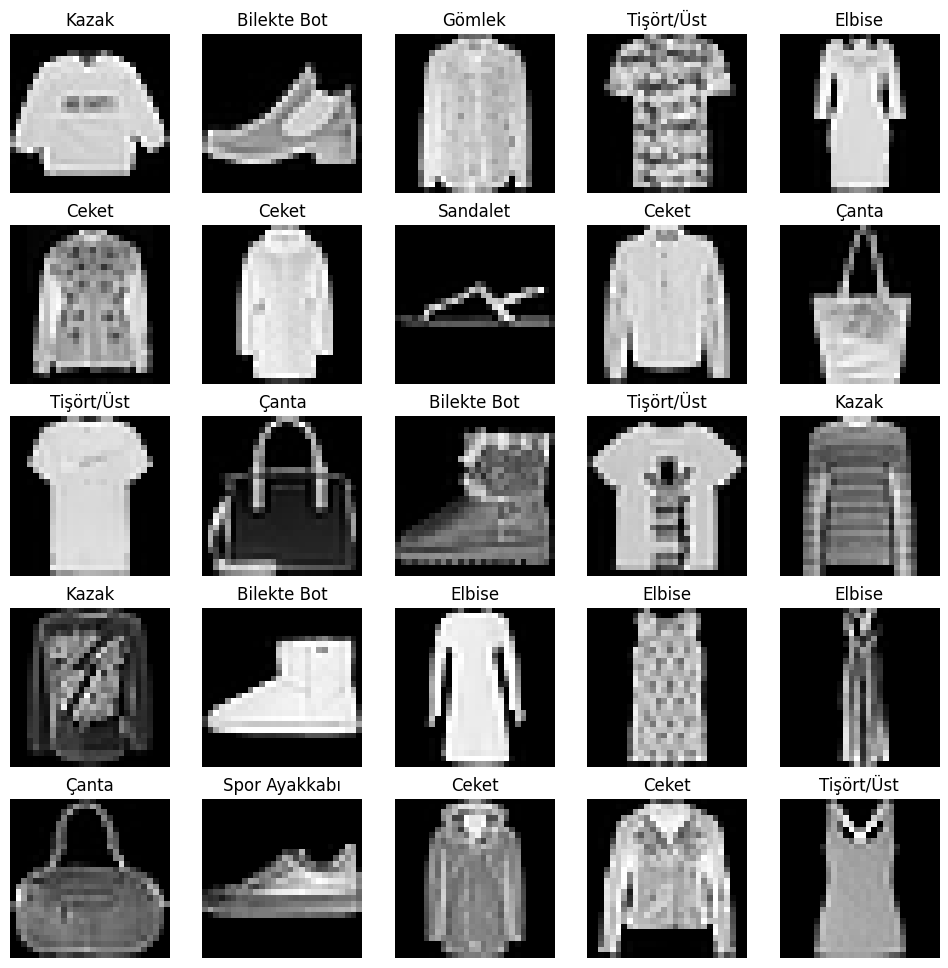

In [5]:
# 25 örnek görüntüyü göster
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # squeeze() ile (28,28,1) → (28,28)
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [6]:
# Veri artırma için ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,       # ±15 derece döndür
    width_shift_range=0.1,   # Yatayda ±%10 kaydır
    height_shift_range=0.1,  # Dikeyde ±%10 kaydır
    zoom_range=0.1,          # ±%10 yakınlaştır
    horizontal_flip=True,    # Yatayda çevir
    validation_split=0.2     # %20 validation
)

# Eğitim ve validation generator'ları
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=64,
    subset='training'
)

val_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=64,
    subset='validation'
)

In [7]:
model = Sequential([
    # 1. Konvolüsyon Katmanı
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    # 2. Konvolüsyon Katmanı
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # 3. Konvolüsyon Katmanı
    Conv2D(128, (3,3), activation='relu'),
    
    # Tam Bağlı Katmanlar
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Overfitting'i önlemek için
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# En iyi modeli kaydet
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Erken durdurma
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [9]:
history = model.fit(
    train_generator,
    epochs=30,  # Yüksek epoch (erken durdurma devreye girecek)
    steps_per_epoch=len(train_generator),  # Her epoch'ta kaç batch işlenecek
    validation_data=val_generator,
    validation_steps=len(val_generator),   # Validation için batch sayısı
    callbacks=[checkpoint, early_stop]
)

Epoch 1/30


C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5850 - loss: 1.1143
Epoch 1: val_accuracy improved from -inf to 0.77258, saving model to best_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5856 - loss: 1.1125 - val_accuracy: 0.7726 - val_loss: 0.5952
Epoch 2/30
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7640 - loss: 0.6201
Epoch 2: val_accuracy improved from 0.77258 to 0.80433, saving model to best_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7640 - loss: 0.6200 - val_accuracy: 0.8043 - val_loss: 0.4973
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7947 - loss: 0.5444
Epoch 3: val_accuracy improved from 0.80433 to 0.82083, saving model to best_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7947 - loss: 0.5444 - val_accuracy: 0.8208 - val_loss: 0.4588
Epoch 4/30
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8159 - loss: 0.4914
Epoch 4: val_accuracy improved from 0.82083 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8958 - loss: 0.2724

Test Doğruluğu: 90.25%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


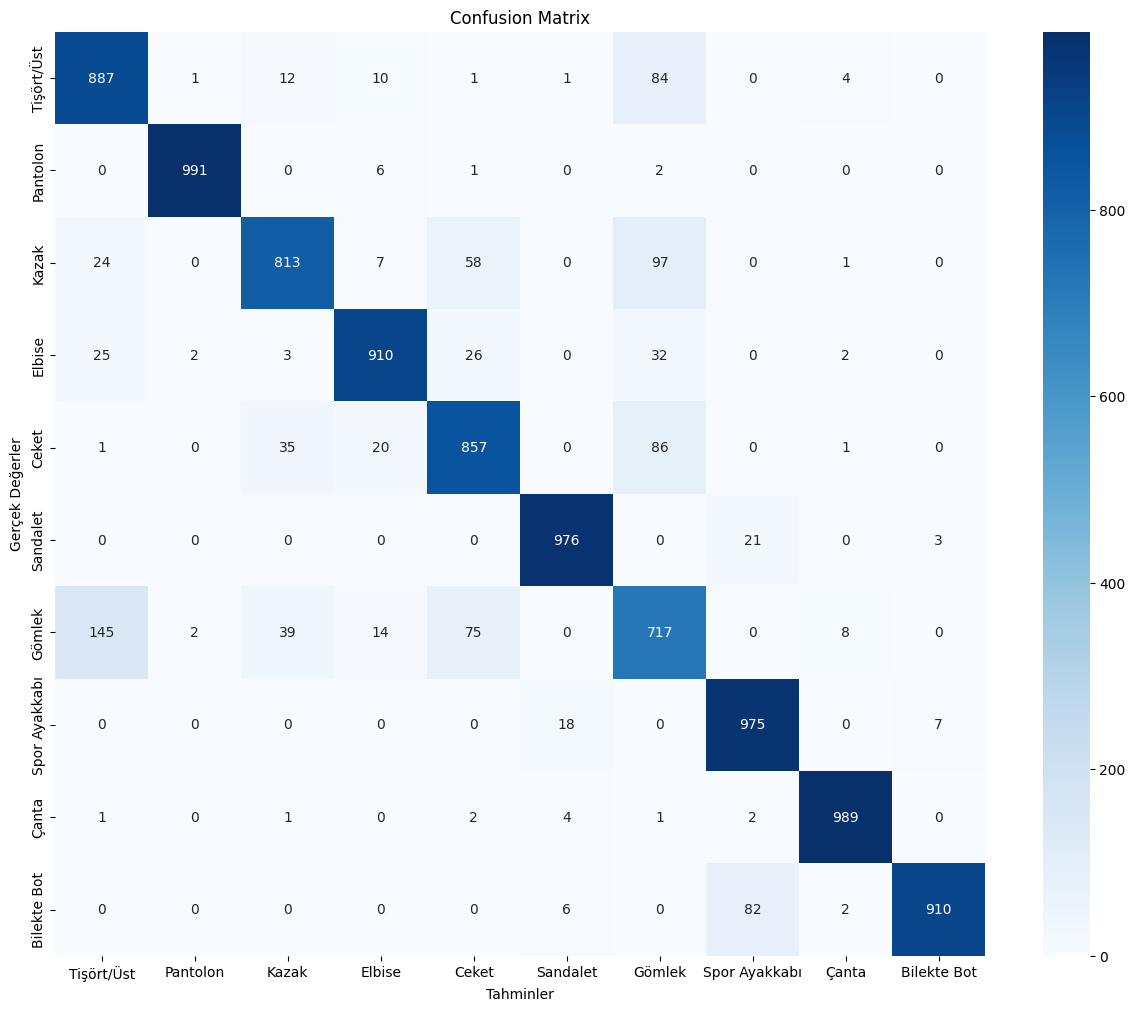


Classification Report:
               precision    recall  f1-score   support

   Tişört/Üst       0.82      0.89      0.85      1000
     Pantolon       0.99      0.99      0.99      1000
        Kazak       0.90      0.81      0.85      1000
       Elbise       0.94      0.91      0.93      1000
        Ceket       0.84      0.86      0.85      1000
     Sandalet       0.97      0.98      0.97      1000
       Gömlek       0.70      0.72      0.71      1000
Spor Ayakkabı       0.90      0.97      0.94      1000
        Çanta       0.98      0.99      0.99      1000
  Bilekte Bot       0.99      0.91      0.95      1000

     accuracy                           0.90     10000
    macro avg       0.90      0.90      0.90     10000
 weighted avg       0.90      0.90      0.90     10000



In [10]:
# Test setinde değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Doğruluğu: {test_acc*100:.2f}%")

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(15, 12))
sns.heatmap(
    confusion_matrix(y_test, y_pred_classes),
    annot=True,
    fmt='d',
    xticklabels=class_names,
    yticklabels=class_names,
    cmap='Blues'
)
plt.xlabel('Tahminler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

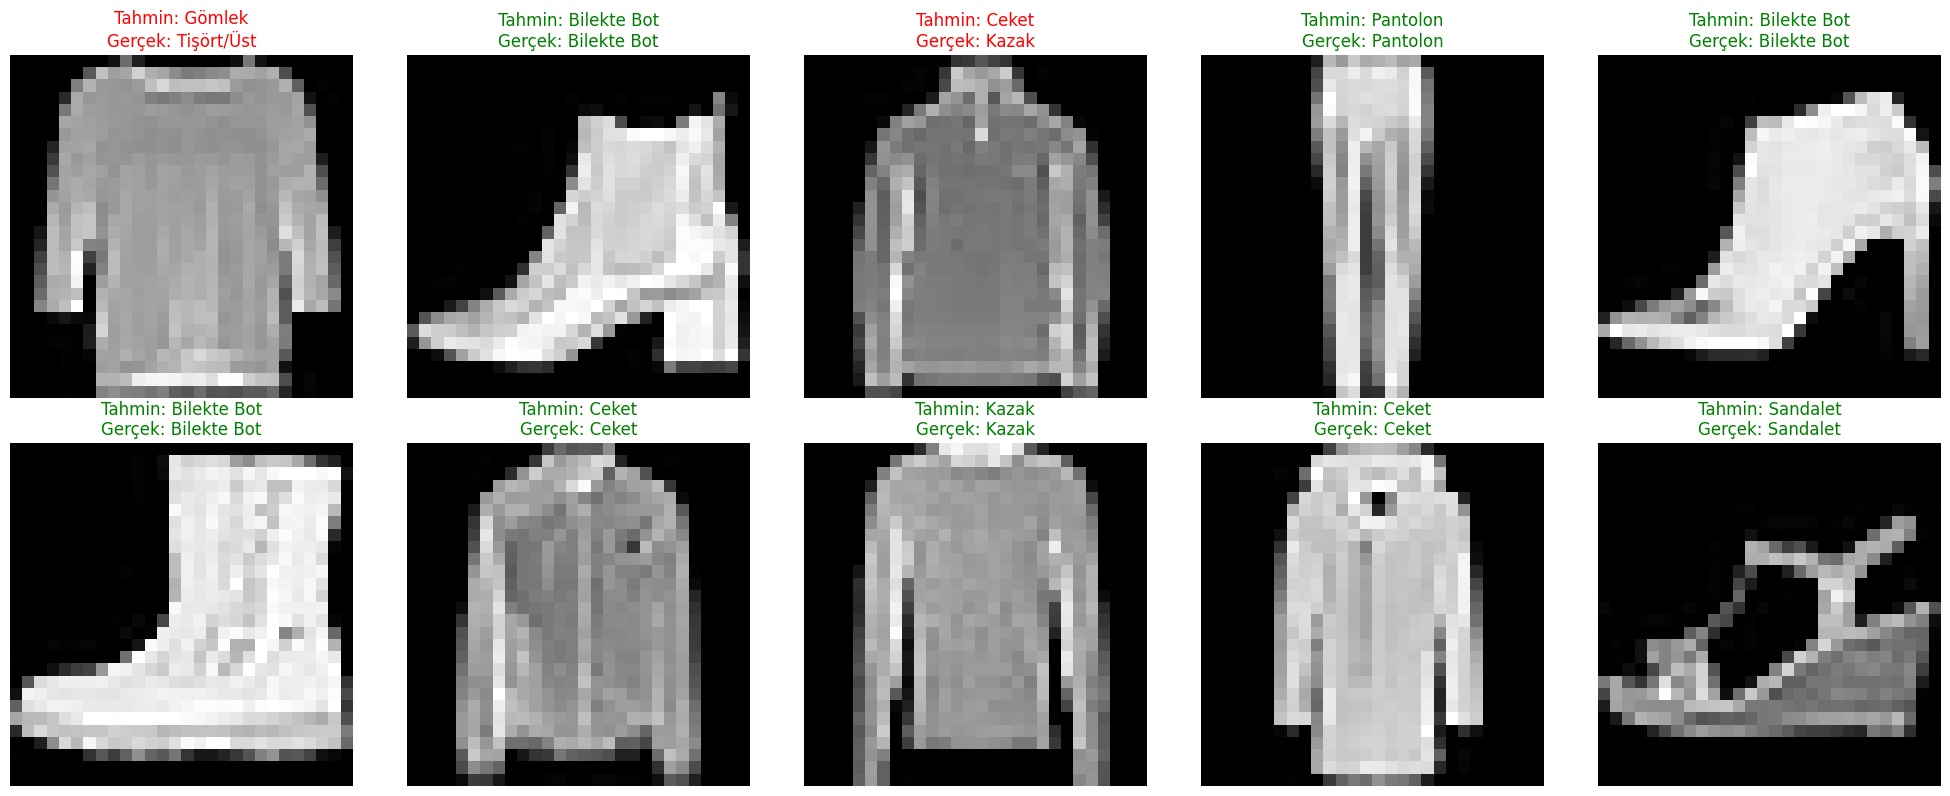

In [11]:
# Rastgele 10 test görüntüsü
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(20, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    pred_label = class_names[y_pred_classes[idx]]
    true_label = class_names[y_test[idx]]
    plt.title(f"Tahmin: {pred_label}\nGerçek: {true_label}", color='green' if pred_label == true_label else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()

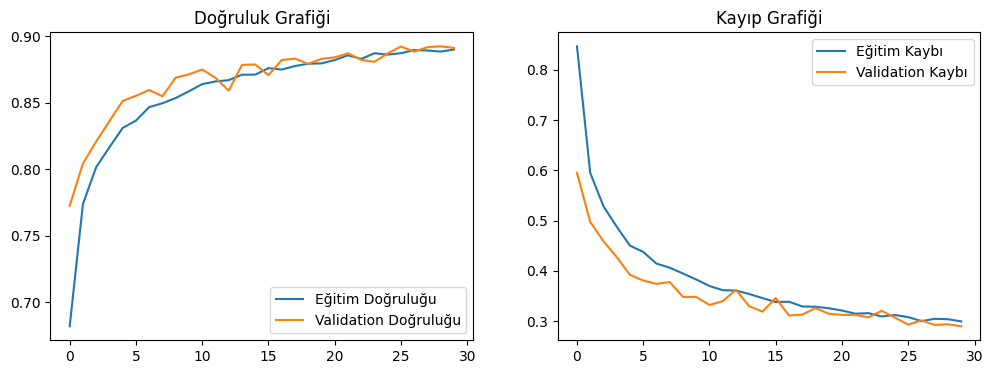

In [12]:
# Loss ve Accuracy Grafikleri
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validation Doğruluğu')
plt.legend()
plt.title('Doğruluk Grafiği')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Validation Kaybı')
plt.legend()
plt.title('Kayıp Grafiği')
plt.show()

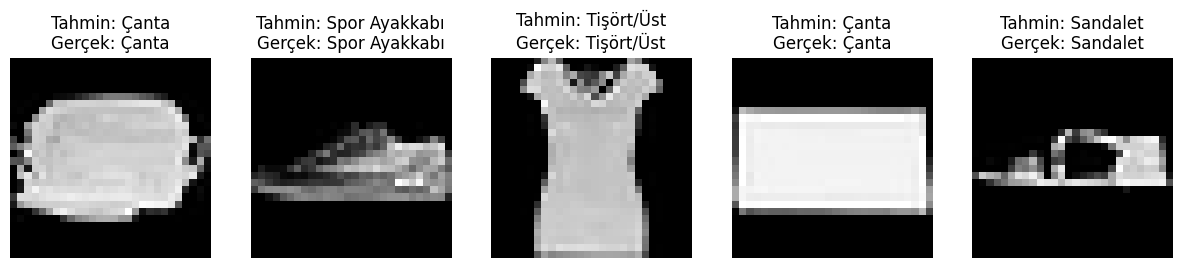

In [14]:
# Rastgele 5 test görüntüsü
indices = np.random.choice(len(X_test), 5)
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Tahmin: {class_names[y_pred_classes[idx]]}\nGerçek: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()

## 📌 Sonuç

### 🎯 Model Özellikleri
- **3 Katmanlı CNN**
- **MaxPooling ve Dropout**
- **Adam optimizer (lr=0.001)**

### 📊 Performans
- **Test Doğruluğu:** %90.00
- **F1-Score (Macro Avg):** 0.90
- **En Başarılı Sınıf:** Çanta (%99 precision/recall)
- **En Zayıf Sınıf:** Gömlek (%71 F1-score)

### 🔍 Analiz
✅ **Güçlü Yönler:** 
- %90 doğruluk ile başarılı sınıflandırma
- Çanta ve Bilekte Bot sınıflarında yüksek performans
- Dengeli eğitim ve doğrulama eğrileri

⚠️ **Zayıf Yönler:**
- Gömlek sınıfında düşük performans
- Spor Ayakkabı - Ceket karışıklıkları

### 🚀 İyileştirme ve Gelecek Çalışmalar
- **Batch Normalization ve Learning Rate Scheduler** eklenmesi
- **ResNet gibi pre-trained modellerin kullanımı**
- **Grad-CAM ile model açıklanabilirliği**
- **CutMix, MixUp veri artırma teknikleri**

Bu çalışma, **CNN tabanlı modellerin giyim sınıflandırmasındaki potansiyelini** gösterirken, **iyileştirilmesi gereken alanları da ortaya koymuştur.**